# Titanic - Exploratory Data Analysis

<center><img src="https://s26162.pcdn.co/wp-content/uploads/sites/3/2021/02/titanic-feat1.jpg"></center>

**Признаки (атрибуты) датасета:**

- **Pclass** - класс, в котором плыл пассажир, passenger class 

- **SibSp** - количество братьев-сестёр/супругов на борту, sibling/spouse

- **Parch** - количество детей/родителей пассажира на борту, parent/children

- **Cabin** - номер каюты 

- **Embarked** - порт посадки на корабль

и др.

**Целевая переменная** - ***Survived***

In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
sns.set_palette('Set1')

# Context

In [419]:
passenger_data = pd.read_csv('train.csv', index_col='PassengerId')
passenger_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

## General information

In [420]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [421]:
passenger_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [422]:
passenger_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


## Missing values

In [245]:
percent_of_null = passenger_data.isnull().sum() * 100 / passenger_data.shape[0]

percent_of_null \
    .to_frame() \
    .set_axis(['% of NaN'], axis=1) \
    .sort_values(by='% of NaN', ascending=False)

,% of NaN
Cabin,67.866
Ticket,4.623
Age,3.292
Embarked,0.250
Fare,0.134
Survived,0.000
Pclass,0.000
Name,0.000
Sex,0.000
SibSp,0.000


## Outliers detection

In [246]:
Q1 = passenger_data.quantile(0.25)
Q3 = passenger_data.quantile(0.75)
IQR = Q3 - Q1

outliers_percent = ((passenger_data < (Q1 - 1.5 * IQR)) | (passenger_data > (Q3 + 1.5 * IQR))).sum() * 100 / passenger_data.shape[0]
outliers_percent \
    .to_frame() \
    .set_axis(['% of outliers'], axis=1) \
    .sort_values(by='% of outliers', ascending=False)

,% of outliers
Fare,17.161
SibSp,3.231
Parch,2.228
Age,0.000
Cabin,0.000
Embarked,0.000
Name,0.000
Pclass,0.000
Sex,0.000
Survived,0.000


# Data exploration

## Categorical variables

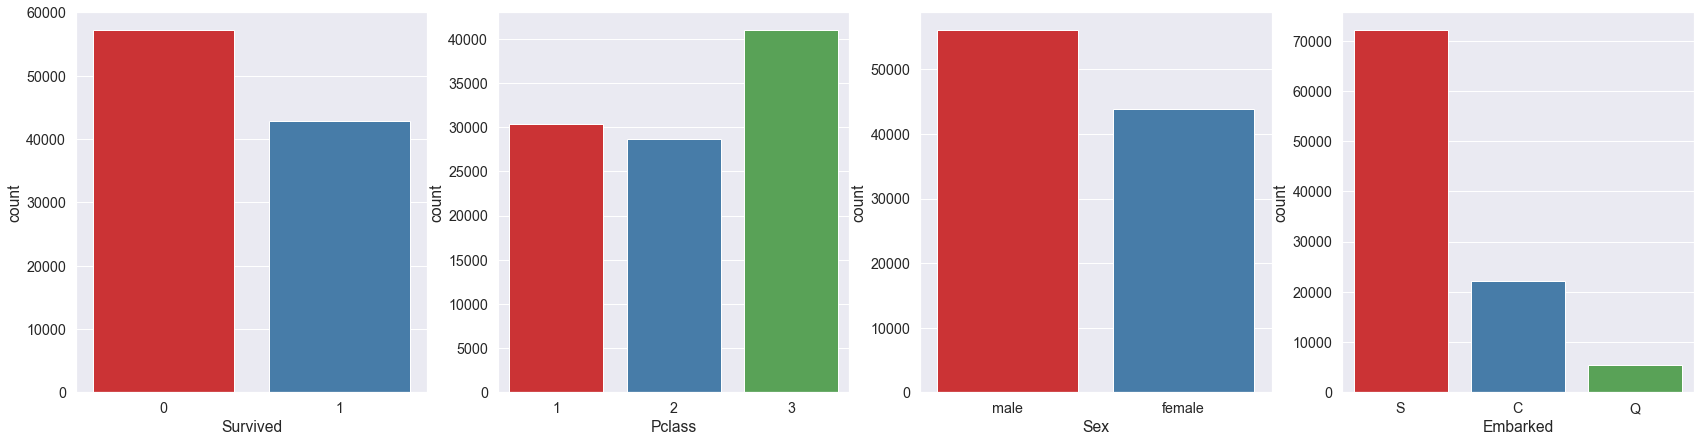

In [468]:
categor_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
fig, ax = plt.subplots(1,4, figsize = (29,7))
 
for i, ax in enumerate(fig.axes):
    sns.countplot(x=categor_columns[i], data=passenger_data, ax=ax)

По данным графикам можно сделать следующие выводы:

- Погибших среди пассажиров больше, чем выживших
- Пассажиры в основном занимали каюты 3-его класса
- Мужчин было больше, чем женщин
- Чаще всего люди садились на корабль из порта Southampton

## Numerical variables

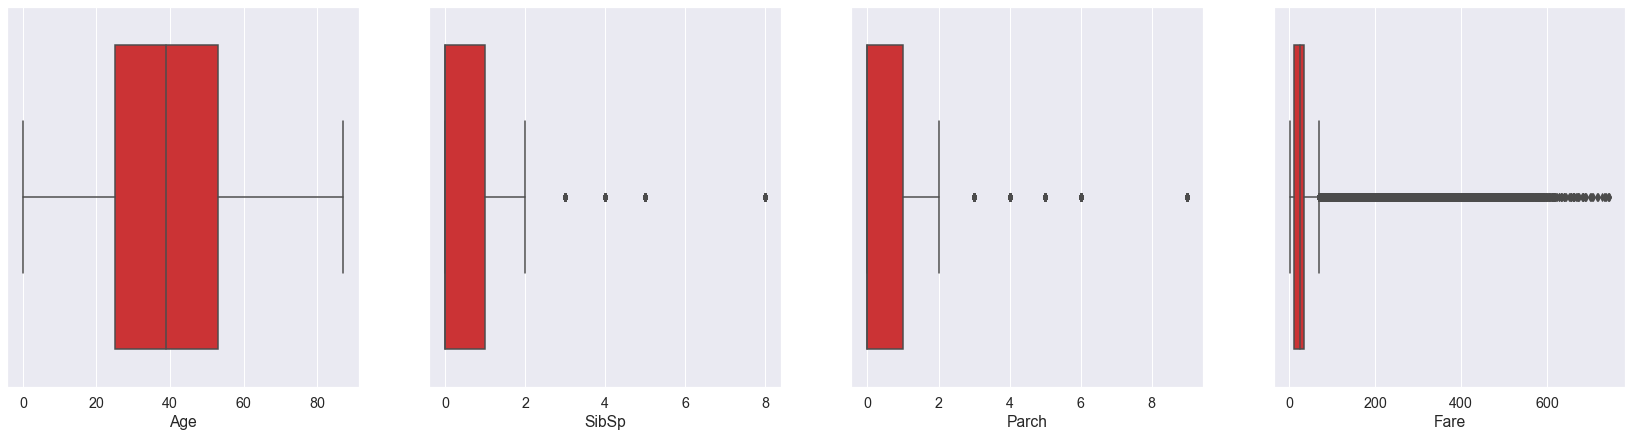

In [470]:
num_columns = ['Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(1,4, figsize = (29,7))
 
for i, ax in enumerate(fig.axes):
    sns.boxplot(x=num_columns[i], data=passenger_data, ax=ax);

- Как видно из графиков выше, выбросов в колонке **Age** не наблюдается, что не скажешь особенно о колонке **Fare**.

## Basic data analysis

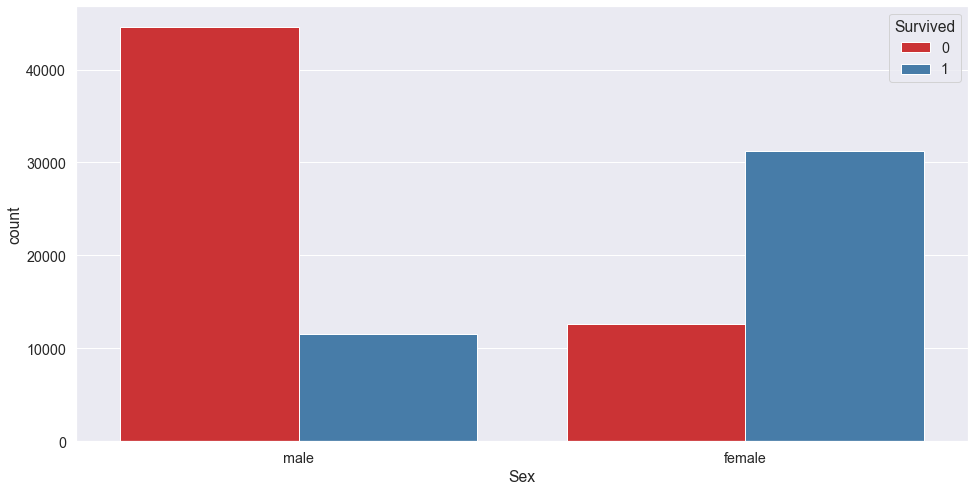

In [471]:
plt.figure(figsize=(16,8))
sns.countplot(x='Sex', data=passenger_data, hue='Survived');

- Шансы выжить у женщин больше, чем у мужчин

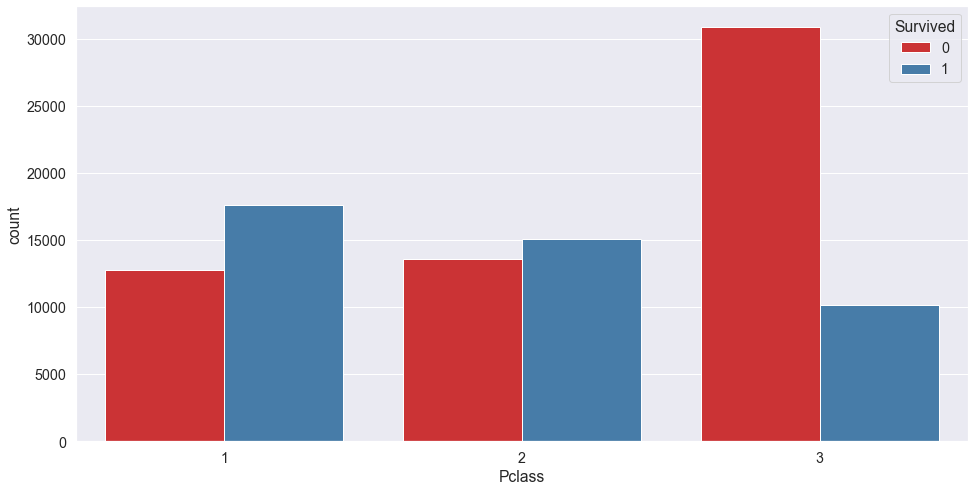

In [472]:
plt.figure(figsize=(16,8))
sns.countplot(x='Pclass', data=passenger_data, hue='Survived');

- Шансы на выживание в третьем классе каюты значительно ниже, чем в других. Это можно обосновать тем, что номера третьего класса расположены ниже остальных на корабле, а следовательно при крушении корабля пассажиры почти не успевают полняться наверх и спастись.

Создадим новую колонку на основе **SibSp** и **Parch** - **Family_size**, которая будет отвечать за количество родственников на борту корабля.

In [473]:
passenger_data['Family_size'] = passenger_data['SibSp'] + passenger_data['Parch']
passenger_data[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,2
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,3


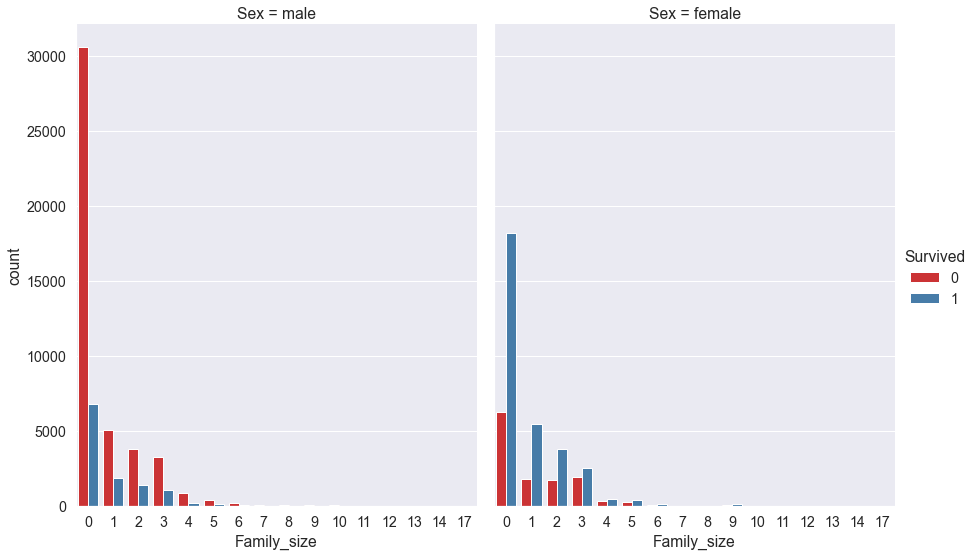

In [474]:
sns.catplot(x='Family_size', hue='Survived', col='Sex', data=passenger_data, kind='count', height=8, aspect=.8);

- Для женщин небольшое количество родственников существенно повышает вероятность выжить.

Создадим новую колонку, отвечающую за наличие родственников на борту, и назовем ее **NotAlone**.

In [475]:
passenger_data['NotAlone'] = [0 if a == 0 else 1 for a in passenger_data['Family_size']]
passenger_data[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,NotAlone
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,2,1
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,0,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,3,1


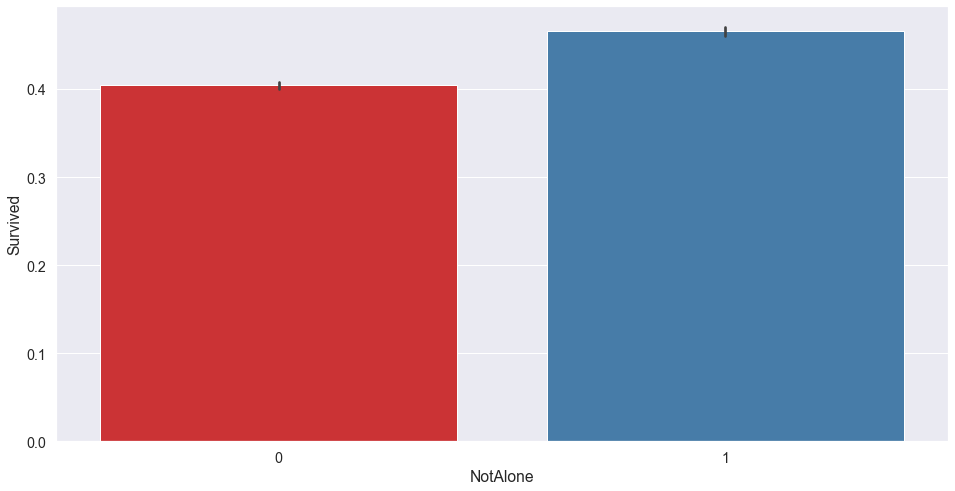

In [476]:
plt.figure(figsize=(16,8))
sns.barplot(y ='Survived', x='NotAlone', data = passenger_data);

- На первый взгляд кажется, что присутствие родственников на борту повышает вероятность выжить.

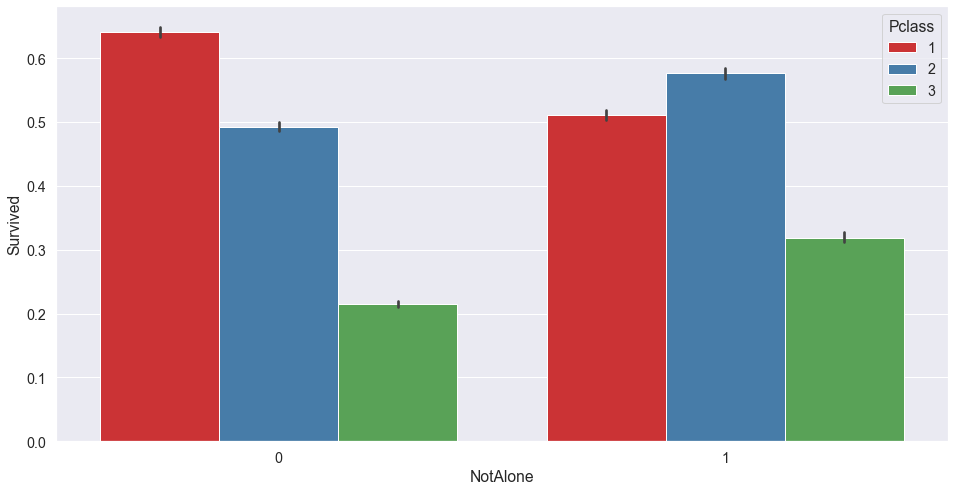

In [477]:
plt.figure(figsize=(16,8))
sns.barplot(y ='Survived', x='NotAlone', hue='Pclass', data = passenger_data);

- Для пассажиров второго и третьего классов отсутствие родственников на борту уменьшает вероятность выжить, что нельзя сказать о пассажирах первого класса.sns.barplot(y ='Survived', x='NotAlone', hue='Pclass', data = passenger_data);

### Age vs Survived

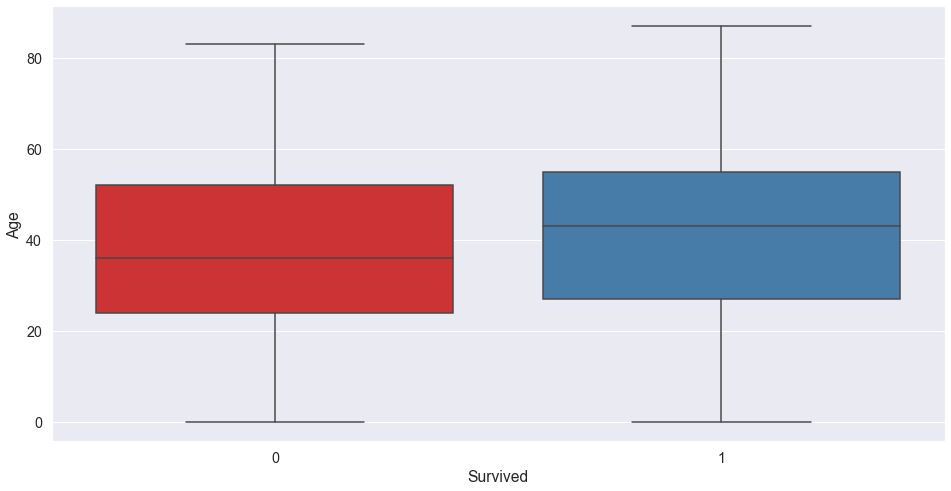

In [478]:
plt.figure(figsize=(16,8))
sns.boxplot(y='Age', x='Survived', data=passenger_data);

- Самые пожилые люди (80+) выжили.
- Второй боксплот расположен выше первого (и медиана также выше) - а это означает, что у старших людей немного выше вероятность выжить. Также это может быть связано с тем, что чем человек старше, тем у него благосостояние выше, а следовательно он может себе позволить путешествовать более престижным классом (докажем это ниже). И как мы убедились ранее, вероятность выживания пассажиров первого и второго классов превосходит вероятности смерти.

### Age vs Pclass

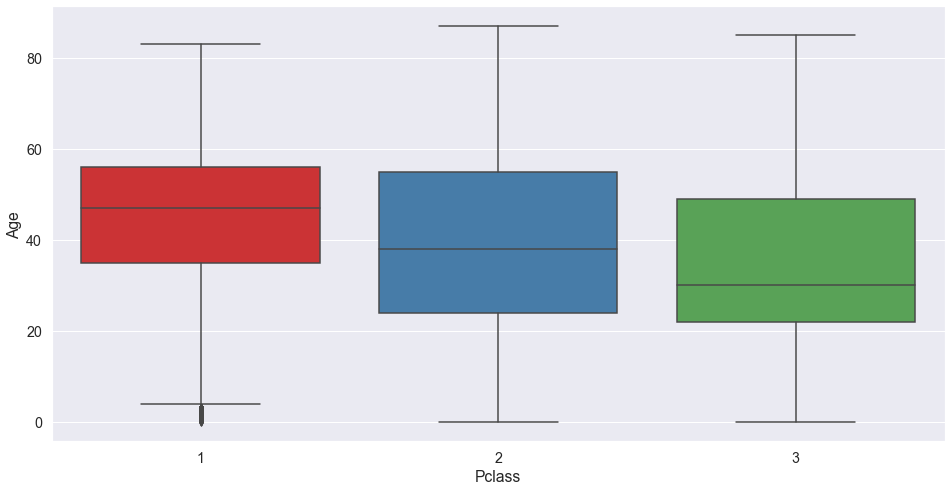

In [479]:
plt.figure(figsize=(16,8))
sns.boxplot(y='Age', x='Pclass', data=passenger_data);

- Подтвердилась наша теория о том, что более возрастные люди располагают достатком и покупают билеты высоких классов

Зависимость между возрастом, классом билета и выживаемостью можно также проиллюстрировать с помощью одного графика:

### Age vs Pclass vs Survived

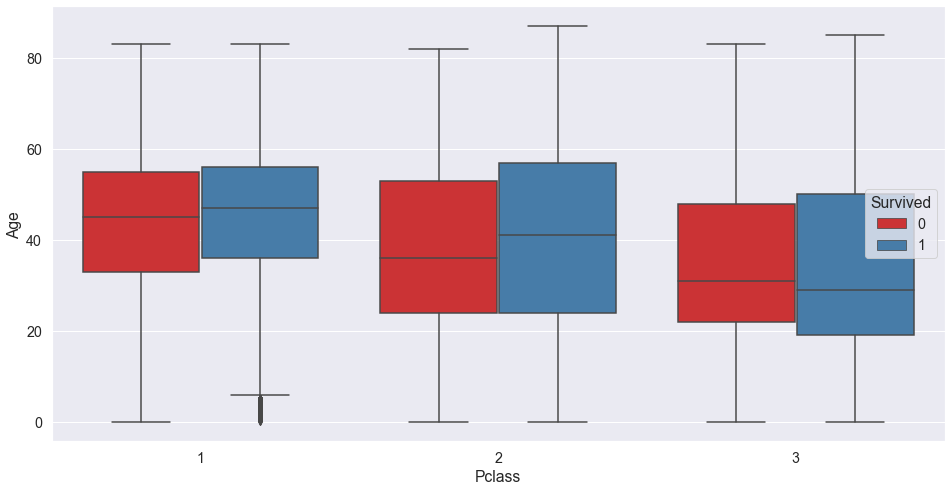

In [480]:
plt.figure(figsize=(16,8))
sns.boxplot(y='Age', x='Pclass', hue='Survived', data=passenger_data);

- Таким образом, класс билета будет играть определяющую роль при прогнозировании смертности.

### Fare vs Pclass

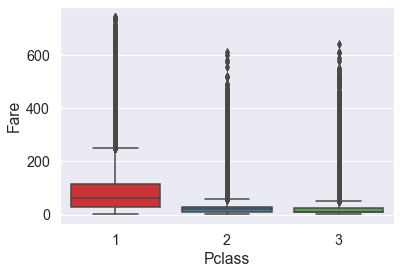

In [481]:
sns.boxplot(y='Fare', x='Pclass', data=passenger_data); 

- Прослеживается связь между ценой билета и номером класса: чем выше цена, тем престижнее класс

### Pclass vs Embarked vs Sex vs Survived

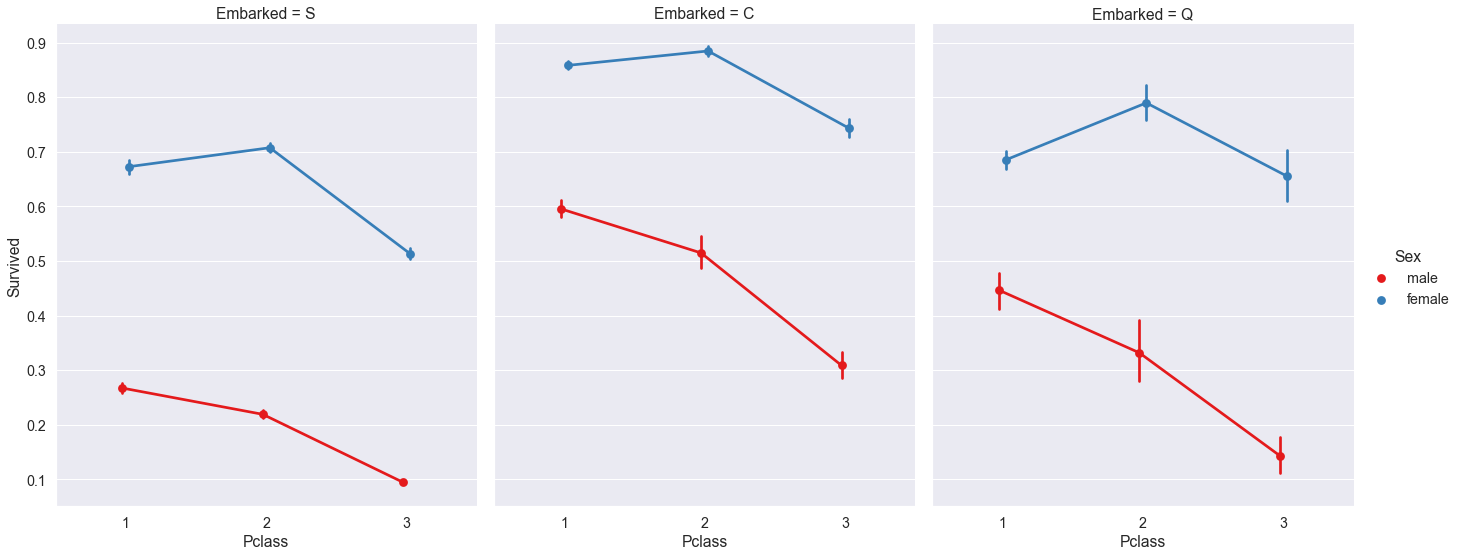

In [482]:
sns.catplot(x='Pclass', y='Survived',
                hue='Sex', col='Embarked',
                data=passenger_data, kind='point',
                dodge=True,
                height=8, aspect=.8);

- Женщины имеют определенно большую вероятность выжить, чем мужчины
- Шансов на спасение больше у тех пассажиров, кто сел на корабль из порта Cherbourg
- Мужчины, располагающиеся в каютах первого класса, и женщины в каютах второго класса имеют большую вероятность на спасение

Таким образом, порт посадки и пол пассажира будут важными признаками при обучении модели

### Fare range vs Survived

Создадим новую колонку в нашем датасете - **Fare_range** разделением переменной **Fare** на интервалы 

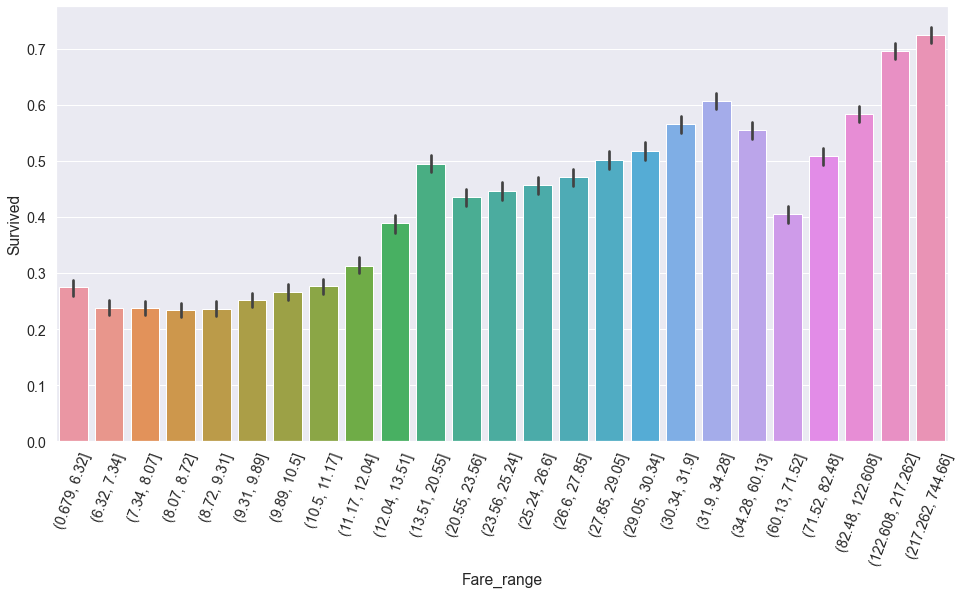

In [483]:
plt.figure(figsize=(16,8))
passenger_data['Fare_range'] = pd.qcut(passenger_data['Fare'], 25)
sns.barplot(x ='Fare_range', y ='Survived', data = passenger_data)
plt.xticks(rotation=70);

- На графике прослеживается зависимость между ценой билета и выживаемостью.

### Fill missing values

Поскольку в колонке **Cabin** пропущенных значений больше половины - около **68%**,то можем удалить данную колонку из нашего датасета. Также можно удалить и те колонки, которые не несут полезной информации, а именно **Name** и **Ticket**.

In [484]:
useless_columns =  ['Cabin', 'Name', 'Ticket']
passenger_data.drop(useless_columns, axis=1, inplace=True)

- **Age**

Как мы уже видели, существует зависимость между возрастом пассажиров и номером класса каюты. Действительно, чем старше пассажир, его благосостояние выше, а соответственно выше и тот уровень комфорта, который он может себе позволить. Таким образом, можно заменить пропущенные значения возраста для пассажира на средний возраст по номеру класса каюты. Это будет более эффективно, нежели мы бы заменили пропуски на средний возраст по всем пассажирам.

In [485]:
passenger_data['Age'] = passenger_data.groupby('Pclass')['Age'].transform(lambda group: group.fillna(group.mean()))
passenger_data[:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,NotAlone,Fare_range
PassengerId,,,,,,,,,,,
0,1,1,male,44.774464,2,0,27.14,S,2,1,"(26.6, 27.85]"
1,0,3,male,33.407362,0,0,13.35,S,0,0,"(12.04, 13.51]"
2,0,3,male,0.330000,1,2,71.29,S,3,1,"(60.13, 71.52]"


- **Fare**

Аналогичная зависимоть видна между колонками **Fare** и **Pclass**. Чем престижнее класс и более комфортные условия, тем выше средняя цена за билет. Поэтому пропущенные значения можно заменить медианой по номеру класса.

In [486]:
passenger_data['Fare'] = passenger_data.groupby('Pclass')['Fare'].transform(lambda group: group.fillna(group.median()))

- **Embarked**

Поскольку **Embarked** - категориальная переменная, то заменим пропущенные значения в этой колонке на значение, которое встречается чаще других.

In [487]:
passenger_data['Embarked'] = passenger_data['Embarked'].fillna(passenger_data['Embarked'].mode()[0])

In [488]:
num_columns = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
passenger_data.Sex.replace(('male','female'), (0,1), inplace = True)
passenger_data.Embarked.replace(('C','Q','S'), (0,1,2), inplace = True)
passenger_data[num_columns].head()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,44.774464,0,2,0,27.14,2
1,0,3,33.407362,0,0,0,13.35,2
2,0,3,0.330000,0,1,2,71.29,2
3,0,3,19.000000,0,0,0,13.04,2
4,1,3,25.000000,0,0,0,7.76,2


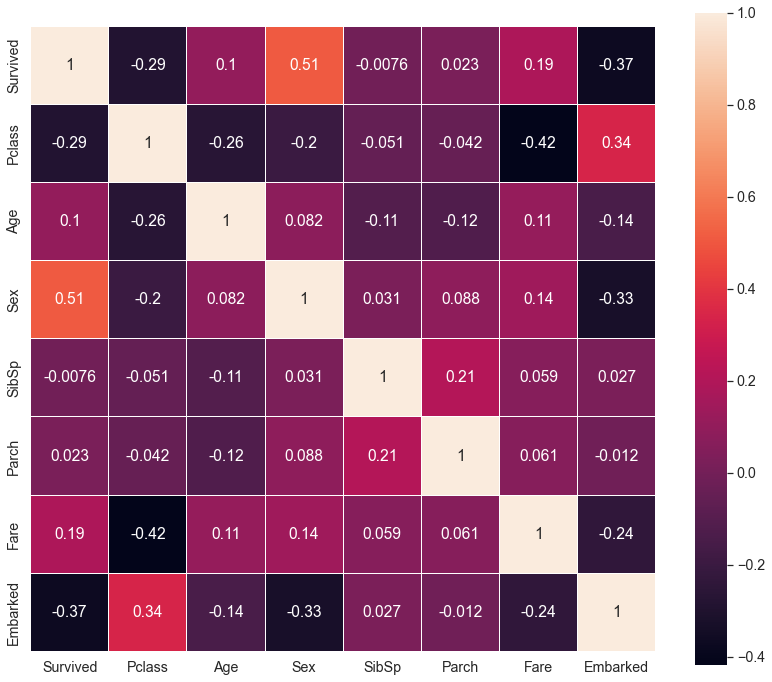

In [489]:
plt.figure(figsize=(14,12))
sns.heatmap(passenger_data[num_columns].corr(),linewidths=0.1, square=True,  linecolor='white', annot=True)
plt.show()

- Положительная корреляция прослеживается между выживаемостью и полом пассажира. Как мы выяснили ранее, у женщин вероятность выжить больше.
- Небольшая зависимость видна между номером класса и портом отправления. 
- Отрицательная корреляция есть между номером класса и ценой за билет. Чем лучше (меньше по номеру) класс, тем цена выше.
- Видна малая зависимость между выживаемостью и портом посадки. Вероятность на выживание больше у тех ассажиров, кто отпраивлся из порта Cherbourg.
- Среди остальных переменных корреляция очень слабая.

# Summary

### Таким образом:

- Были выявлены определённые закономерности в данных.
- Были созданы дополнительные признаки Family_size, NotAlone, Fare_range, которые могут оказать влияние на целевой признак **Survived** и могут быть использованы при создании модели. 
- Были заменены пропуски в данных в зависимости от других переменных, что позволило минимизировать искажение данных.

Еще одной важной частью по подготовке данных к созданию моделей является обработка выбросов.

### Обработка выбросов


Как мы ранее уже выяснили, выбросы присутствуют в таких колонках, как **Fare** - 17,16%, **SibSp** - 3,23%, **Parch** - 2,23%. Они являются экстремальными значениями, которые могут значительно ухудшить качество построенных нами моделей впоследствии, поэтому следует удалить эти значения.